In [1]:
import numpy as np
import matplotlib as plt 
import matplotlib.pyplot as plt
from astropy.io import fits
from photutils.aperture import CircularAperture

1. Open the FITS file 

    ref: https://www.youtube.com/watch?v=goH9yXu4jWw

In [2]:
Y13 = fits.open('18:07:13.fts')

In [3]:
Y13

In [4]:
Y13.info()

Filename: 18:07:13.fts
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     157   (2048, 2048, 2)   float32   


In [5]:
Y13[0].header

SIMPLE  =                    T / Written by IDL:  Thu Jul 18 09:43:11 2013      
BITPIX  =                  -32 / Number of bits per data pixel                  
NAXIS   =                    3 / Number of data axes                            
NAXIS1  =                 2048 / Length of data axis 1 (columns)                
NAXIS2  =                 2048 / Length of data axis 2 (rows)                   
NAXIS3  =                    2 / Length of data axis 3 (planes)                 
EXTEND  =                    F / This file may contain extensions (T/F)         
COMMENT                                                                         
COMMENT ______________________ FITS File Content Keywords ______________________
COMMENT                                                                         
ORIGIN  = 'National Solar Observatory Integrated Synoptic Program (NISP)'       
DATE    = '2013-07-18T16:43:11'/ [YYYY-MM-DDThh:mm:ss] UTC file creation time   
VERSION = '5.2     '        

In [6]:
data = Y13[0].data

In [7]:
print (type(data))
print (data.shape)
print(data.dtype.name)

<class 'numpy.ndarray'>
(2, 2048, 2048)
float32


In [8]:
print ('Min:', np.min(data))
print ('Max:', np.max(data))
print ('Mean:', np.mean(data))
print ('Stdev:', np.std(data))

Min: -455.13144
Max: 1649.8633
Mean: 490.78232
Stdev: 673.5476


Plane 1 (Equivalent Width): This plane shows the strength of the absorption or emission lines in milliAngstroms. Dark areas in the image correspond to regions with stronger absorption, where the light has been absorbed by material in the Sun's atmosphere.

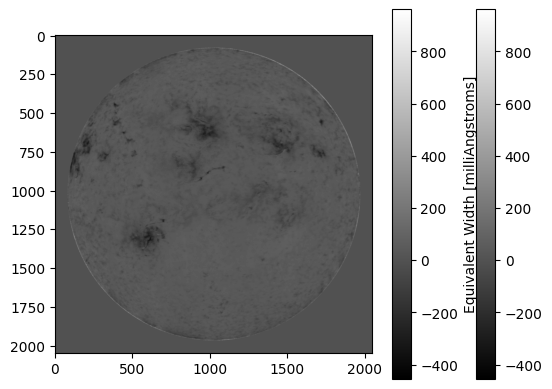

In [9]:
# Extract the first 2D plane from your data (Equivalent Width)
plane1 = data[0, :, :]  # Shape (2048, 2048)

# Now you can plot this 2D array
plt.imshow(plane1, cmap='gray')
plt.colorbar()
plt.colorbar(label='Equivalent Width [milliAngstroms]')
plt.show()

Plane 2 (Continuum Intensity): This plane shows the overall brightness of the Sun's surface (in counts). Sunspots, for example, would appear darker in the continuum intensity image due to the cooler temperature in these regions.

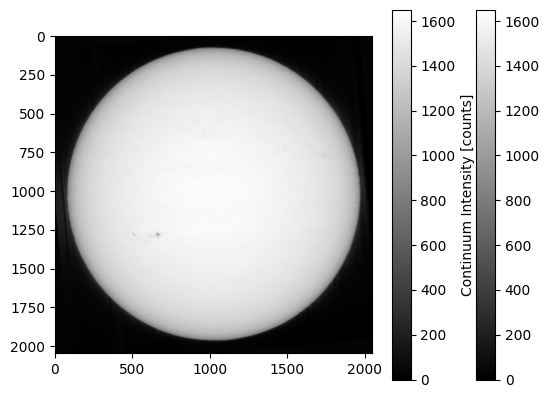

In [10]:
# Extract the second 2D plane from your data (Continuum Intensity)
plane2 = data[1, :, :]  # Shape (2048, 2048)

# Plot the second plane
plt.imshow(plane2, cmap='gray')
plt.colorbar()
plt.colorbar(label='Continuum Intensity [counts]')
plt.show()

more understanding required for code in the next cell

In [11]:
from skimage import filters, measure

# Apply a threshold to segment the Sun from the background
threshold_value = filters.threshold_otsu(plane2)
binary_image = plane2 > threshold_value

# Find contours in the thresholded image
contours = measure.find_contours(binary_image, level=0.5)

# Identify the largest contour (should correspond to the Sun's disk)
largest_contour = max(contours, key=len)

# Calculate the center and radius
y_center = np.mean(largest_contour[:, 0])
x_center = np.mean(largest_contour[:, 1])
radii = np.sqrt((largest_contour[:, 0] - y_center) ** 2 + (largest_contour[:, 1] - x_center) ** 2)
radius = np.mean(radii)

print(f"Center: ({x_center}, {y_center}), Radius: {radius}")

Center: (1017.158111124163, 1026.6796076588746), Radius: 940.0917093405263


In [12]:
# Create a circular mask for the Sun's disk
ny, nx = plane2.shape  # extracts the height (ny) and width (nx) of the 2D image (plane2)
y, x = np.ogrid[:ny, :nx]  # Create  two separate arrays that correspond to the row indices (y) and column indices (x) of the image

# Create a circular mask
distance_from_center = np.sqrt((x - x_center)**2 + (y - y_center)**2)
mask = distance_from_center <= radius

# Apply the mask to the image (set background pixels to zero)
sun_region = np.where(mask, plane2, 0)

# Calculate the integrated flux of the Sun (sum of the pixels within the disk)
integrated_flux_sun = sun_region.sum()

# Print the result
print(f"Integrated Flux of the Sun: {integrated_flux_sun} counts")


Integrated Flux of the Sun: 3985131008.0 counts


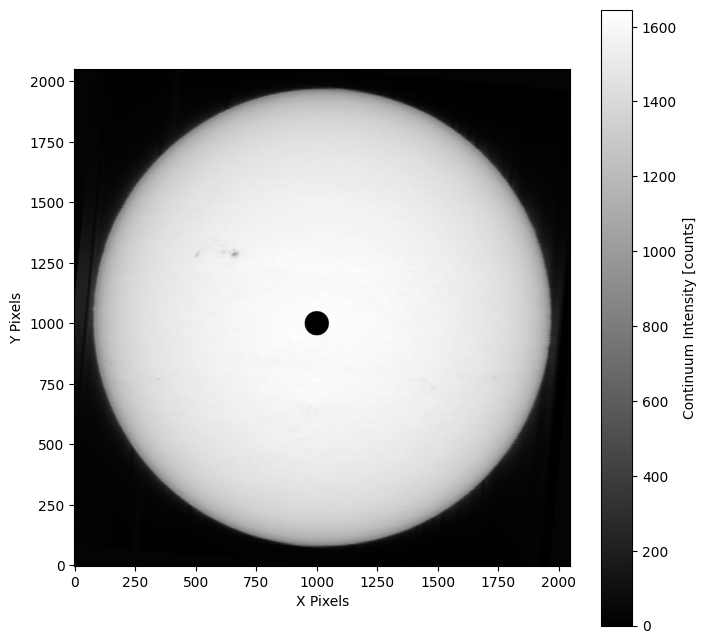

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# Step 1: Open the FITS file and extract the data
file_path = '18:07:13.fts'
with fits.open(file_path) as hdul:
    data = hdul[0].data  # Extract the 3D data array

# Step 2: Extract the second plane (Continuum Intensity)
plane2 = data[1, :, :]  # Continuum Intensity (2D array)


# Step 3: Define the dot position and radius
dot_position = (1000, 1000)  # (y, x) position of the dot
dot_radius = 50  # Radius of the dot

# Create a grid of pixel coordinates
ny, nx = plane2.shape
y_grid, x_grid = np.ogrid[:ny, :nx]

# Calculate the distance of each pixel from the dot position
distance_from_center = np.sqrt((x_grid - dot_position[1])**2 + (y_grid - dot_position[0])**2)

# Create a circular mask for the dot and set those pixels to 0 (black)
mask = distance_from_center <= dot_radius
plane2[mask] = 0

# Step 4: Plot the modified image with the circular black dot
plt.figure(figsize=(8, 8))
plt.imshow(plane2, cmap='gray', origin='lower')
plt.colorbar(label='Continuum Intensity [counts]')
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')
plt.show()


In [18]:
# Create a circular mask for the Sun's disk
ny, nx = plane2.shape  # extracts the height (ny) and width (nx) of the 2D image (plane2)
y, x = np.ogrid[:ny, :nx]  # Create  two separate arrays that correspond to the row indices (y) and column indices (x) of the image

# Create a circular mask
distance_from_center = np.sqrt((x - x_center)**2 + (y - y_center)**2)
mask = distance_from_center <= radius

# Apply the mask to the image (set background pixels to zero)
sun_region = np.where(mask, plane2, 0)

# Calculate the integrated flux of the Sun (sum of the pixels within the disk)
integrated_flux_sun = sun_region.sum()

# Print the result
print(f"Integrated Flux of the Sun with Dot: {integrated_flux_sun} counts")

Integrated Flux of the Sun with Dot: 3972390400.0 counts
